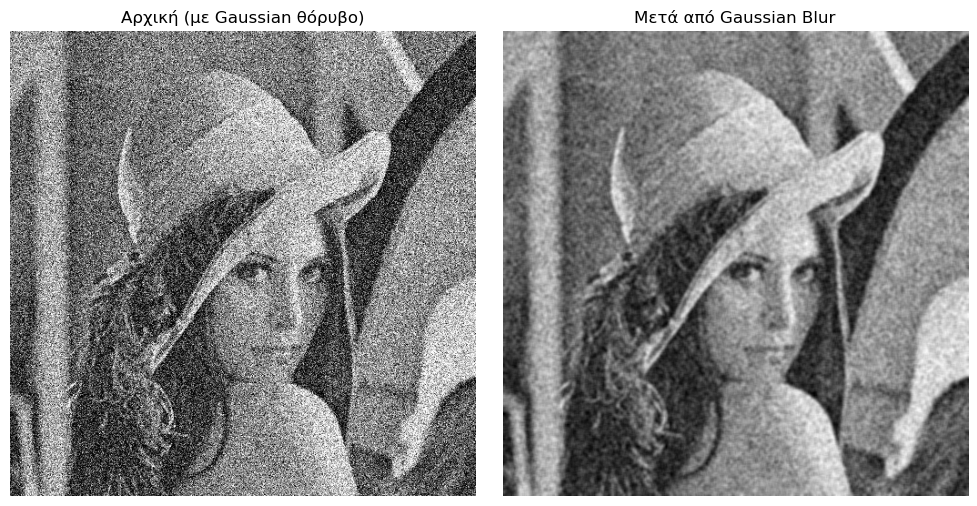

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# 1. Φόρτωση εικόνας
img = cv2.imread('lenna-n1.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Εφαρμογή Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 2)

# 3. Εμφάνιση Αρχική vs Gaussian
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Αρχική (με Gaussian θόρυβο)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Μετά από Gaussian Blur")
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


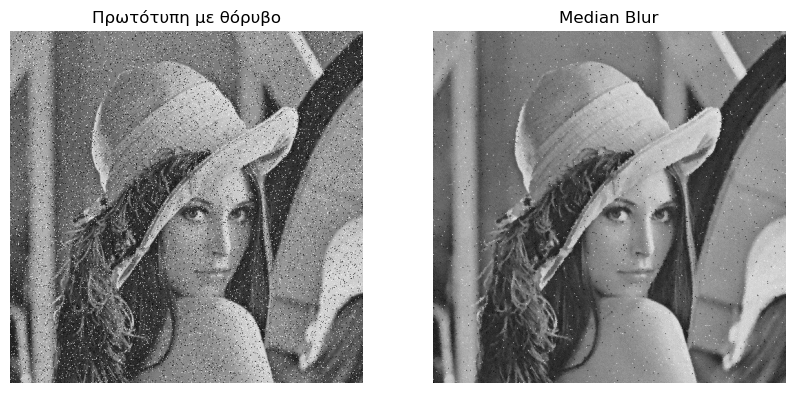

In [19]:
def adaptive_median_filter(image, S_max):
    padded_image = np.pad(image, S_max // 2, mode='constant', constant_values=0)
    output_image = np.copy(image)
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            S = 3
            while S <= S_max:
                # Extracting the subimage
                sub_img = padded_image[i:i + S, j:j + S]
                Z_min = np.min(sub_img)
                Z_max = np.max(sub_img)
                Z_m = np.median(sub_img)
                Z_xy = image[i, j]

                if Z_min < Z_m < Z_max:
                    if Z_min < Z_xy < Z_max:
                        output_image[i, j] = Z_xy
                    else:
                        output_image[i, j] = Z_m
                    break
                else:
                    S += 2
            else:
                output_image[i, j] = Z_m

    return output_image

# Load the image
image_path = "lenna-n2.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive median filtering
S_max = 5 # Maximum window size
filtered_img = adaptive_median_filter(img, S_max)

# Display the original and filtered images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Πρωτότυπη με θόρυβο")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median Blur")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()